In [2]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np # to speed up the calculation
%matplotlib inline

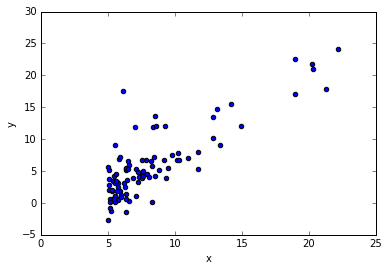

In [3]:
dataframe = pd.read_csv('challenge_dataset.txt', sep = ',', header = None)
dataframe.columns = ['x', 'y']
# Visualizing the data
dataframe.plot(kind='scatter', x = 'x', y = 'y')

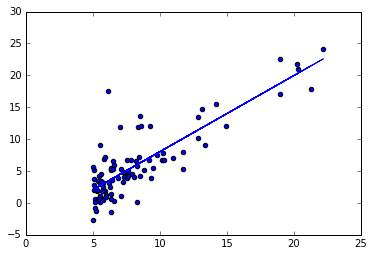

In [5]:
x_values = dataframe[['x']]
y_values = dataframe[['y']]
model = linear_model.LinearRegression()
model.fit(x_values, y_values)

#visualize results
plt.scatter(x_values, y_values)
plt.plot(x_values, model.predict(x_values))
plt.show()

Mean Sqaured Error: 8.95394275195
Coefficient of determination: 0.702031553784


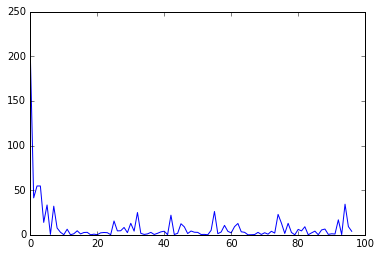

In [8]:
# A function for calculating the residuals for a model
def calc_residuals(act, pred):
    res = (np.array(act) - np.array(pred))**2
    return res
# Evaluating the fit of the model
residuals = calc_residuals(y_values, model.predict(x_values))
print'Mean Sqaured Error:', np.mean(residuals)
print'Coefficient of determination:', model.score(x_values, y_values)
plt.plot(residuals)

The linear regression model that we built exaplins only about 70% of the variation in the dataset. Further as the residual plot is not random, we can say that either we are missing parameters or that our data has a non-linear relationship

### Going for the bonus points
As I am doing this analysis as part of a [challenge](https://github.com/llSourcell/linear_regression_demo), so to get the bonus points lets do a linear regression analysis with more than one independent variable

In [9]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
# having a look at the data
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ..., 
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,
         310.,  101.,   69.,  179.,  185.,  118.,  171.,  166.,  144.,
          97.,  168.,   68.,   49.,   68.,  245.,  184.,  202.,  137.,
          85.,  131.,  283.,  129.,   59.,  341.,   87.,   65.,  102.,
         265.,  276.,  252.,   90.,  100.,   55.,   61.,   92.,  259.,

Mean Sqaured Error: 2859.69039877
Coefficient of determination: 0.517749425413


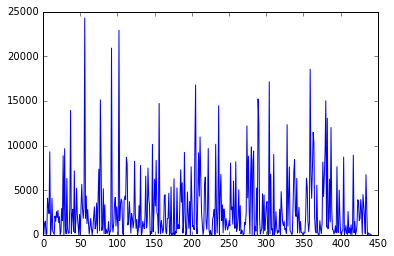

In [10]:
# fiting the linear regression model
model.fit(diabetes.data, diabetes.target)
# calculating the residuals
residuals = calc_residuals(diabetes.target, model.predict(diabetes.data))
# Evaluating the fit of the model
print 'Mean Sqaured Error:', np.mean(residuals)
print 'Coefficient of determination:', model.score(diabetes.data, diabetes.target)
plt.plot(residuals)

Thats a pretty low Coefficient of determination, the model is explaining only 51.775% of the variance. Hmmmmmm lets see if we can improve upon or not. But first lets see what is causing this. 

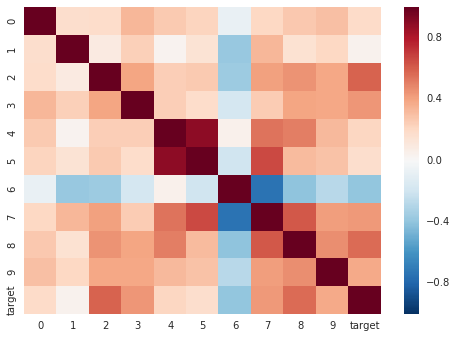

In [11]:
## Checking for correlation between the predictor variables
import seaborn as sns

df_diabetes = pd.DataFrame(diabetes.data)
df_diabetes['target'] = pd.Series(diabetes.target)
sns.heatmap(df_diabetes.corr())

This explains a lot why the linear regression model did not perform well, there is a huge amount of correlation between the predictor variable. Maybe choosing a subset of the predictors will help us achieve a better result. Lets use sklearn feature selection module for this job, we will be performing a greedy search for feature set of size in the range 3 to 10 and find the best model possible.

In [64]:
from sklearn.feature_selection import RFE
for i in range(3, 11):
    rfe = RFE(estimator=model, n_features_to_select=i, step=1)
    rfe.fit(df_diabetes.drop('target', axis = 1), df_diabetes.target)
    selected_columns = list(df_diabetes.columns[rfe.support_])
    selected_columns.append('target')
    df_diabetes_tmp = df_diabetes[selected_columns].copy()
    model.fit(df_diabetes_tmp.drop('target', axis = 1), df_diabetes_tmp.target)
    residuals = calc_residuals(df_diabetes_tmp.target, model.predict(df_diabetes_tmp.drop('target', axis = 1)))
    print 'For', i, 'features, the Mean Squared Error and Coefficient of determination are'
    print 'Mean Sqaured Error:', np.mean(residuals)
    print 'Coefficient of determination:', model.score(df_diabetes_tmp.drop('target', axis = 1), df_diabetes_tmp.target)
    print '---------------------------------------------------------------'

For 3 features, the Mean Squared Error and Coefficient of determination are
Mean Sqaured Error: 3142.69378905
Coefficient of determination: 0.470024487207
---------------------------------------------------------------
For 4 features, the Mean Squared Error and Coefficient of determination are
Mean Sqaured Error: 3104.44203955
Coefficient of determination: 0.476475160391
---------------------------------------------------------------
For 5 features, the Mean Squared Error and Coefficient of determination are
Mean Sqaured Error: 2971.37805517
Coefficient of determination: 0.498914716419
---------------------------------------------------------------
For 6 features, the Mean Squared Error and Coefficient of determination are
Mean Sqaured Error: 2876.67710479
Coefficient of determination: 0.514884832539
---------------------------------------------------------------
For 7 features, the Mean Squared Error and Coefficient of determination are
Mean Sqaured Error: 2868.33728612
Coefficient of

Even after trying out a lot of combination of number of variables, we can't seem to find any ideal combination. Another thing to note is that as the number of predictors increased the Mean squared error decreased. This should mean that there are a lot of different parameters which are not known to us. We can perform further analysis to see if any feature engineering is possible or are there high leverage points we can remove, but that is for some other day. Cheers!!!!

P.S. Siraj, really love your videos, especially the memes :D